In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model,Sequential
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input

In [23]:
folder_path= "../input/nupurdb2204/DB main/"
train_path = folder_path+"Train/"
valid_path =folder_path+"Validate/"
test_path =folder_path+"Test/"


In [24]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(244,244), batch_size=10)

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:179: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 7000 images belonging to 7 classes.
Found 1260 images belonging to 7 classes.
Found 2100 images belonging to 7 classes.


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_batches.classes


In [25]:
#download model- Inernet connection needed
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [26]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [27]:
type(vgg16_model)

keras.engine.functional.Functional

In [28]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
	model.add(layer)


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [30]:
for layer in model.layers:
    layer.trainable = False

In [31]:
model.add(Dense(units=7, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [33]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=100, verbose=2, steps_per_epoch=train_batches.n//train_batches.batch_size)

Epoch 1/100
700/700 - 26s - loss: 1.3397 - accuracy: 0.5217 - val_loss: 1.2893 - val_accuracy: 0.5381
Epoch 2/100
700/700 - 26s - loss: 1.3198 - accuracy: 0.5194 - val_loss: 1.2808 - val_accuracy: 0.5405
Epoch 3/100
700/700 - 26s - loss: 1.2943 - accuracy: 0.5290 - val_loss: 1.2786 - val_accuracy: 0.5325
Epoch 4/100
700/700 - 25s - loss: 1.2704 - accuracy: 0.5453 - val_loss: 1.2296 - val_accuracy: 0.5683
Epoch 5/100
700/700 - 26s - loss: 1.2522 - accuracy: 0.5549 - val_loss: 1.2454 - val_accuracy: 0.5548
Epoch 6/100
700/700 - 25s - loss: 1.2315 - accuracy: 0.5649 - val_loss: 1.1970 - val_accuracy: 0.5810
Epoch 7/100
700/700 - 26s - loss: 1.2069 - accuracy: 0.5766 - val_loss: 1.1661 - val_accuracy: 0.6032
Epoch 8/100
700/700 - 25s - loss: 1.1904 - accuracy: 0.5893 - val_loss: 1.1799 - val_accuracy: 0.6079
Epoch 9/100
700/700 - 25s - loss: 1.1746 - accuracy: 0.5930 - val_loss: 1.1335 - val_accuracy: 0.6183
Epoch 10/100
700/700 - 26s - loss: 1.1566 - accuracy: 0.6016 - val_loss: 1.1276 - 

In [38]:
model.save('./VGG16_model.h5')

In [39]:
predictions = model.predict(x=test_batches, verbose=0)


In [40]:
test_batches.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [41]:
cm=confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))


In [42]:
test_batches.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

Confusion matrix, without normalization
[[36 24 73 14 34 79 40]
 [31 26 71 26 41 72 33]
 [40 14 63 19 41 85 38]
 [37 21 67 20 34 82 39]
 [41 13 72 20 34 76 44]
 [37 21 76 13 40 68 45]
 [35 22 70 17 24 87 45]]


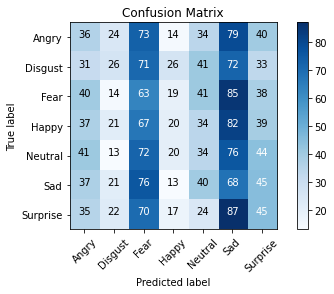

In [43]:
cm_plot_labels = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
